In [44]:
using Pkg, CSV, DataFrames, Statistics, StatsBase, Plots, Distributions, StatsPlots, GLM, MLBase, StatsBase, StatsModels

In [45]:
df = CSV.read("HPRICE3.csv", DataFrame);

# delete obs with year = 1978

In [46]:
describe(df[:,:year])

Summary Stats:
Length:         321
Missing Count:  0
Mean:           1979.327103
Minimum:        1978.000000
1st Quartile:   1978.000000
Median:         1978.000000
3rd Quartile:   1981.000000
Maximum:        1981.000000
Type:           Int64


In [47]:
df = df[(df.year.==1978),:];
describe(df[:,:year])

Summary Stats:
Length:         179
Missing Count:  0
Mean:           1978.000000
Minimum:        1978.000000
1st Quartile:   1978.000000
Median:         1978.000000
3rd Quartile:   1978.000000
Maximum:        1978.000000
Type:           Int64


# (a)

In [5]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,year,1978.0,1978,1978.0,1978,,,Int64
2,age,21.2067,0,5.0,189,,,Int64
3,agesq,1871.21,0,25.0,35721,,,Int64
4,nbh,2.40223,0,2.0,6,,,Int64
5,cbd,16424.6,1000,17000.0,35000,,,Int64
6,inst,17128.5,1000,17000.0,34000,,,Int64
7,linst,9.50407,6.9078,9.741,10.434,,,Float64
8,price,76628.0,26000,75500.0,300000,,,Int64
9,rooms,6.58101,4,7.0,10,,,Int64


# (c)

In [6]:
df[!,:lcbd] = log.(df[:,:cbd]);

In [7]:
fm1 = @formula(lprice ~ 1 + rooms + baths + larea + lland + age + agesq + lcbd)
M1 = lm(fm1, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lprice ~ 1 + rooms + baths + larea + lland + age + agesq + lcbd

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   7.36685     0.557333    13.22    <1e-27   6.26671      8.46699
rooms         0.0620117   0.0222711    2.78    0.0060   0.01805      0.105973
baths         0.0659059   0.0376178    1.75    0.0816  -0.00834911   0.140161
larea         0.379611    0.073453     5.17    <1e-06   0.23462      0.524603
lland         0.106066    0.0328237    3.23    0.0015   0.0412743    0.170858
age          -0.00819035  0.00194103  -4.22    <1e-04  -0.0120218   -0.00435889
agesq         3.58988e-5  1.12353e

In [8]:
percentage_change = 100*(exp(coef(M1)[3])-1);
println("percentage change : ", percentage_change, "\n")

println("ratio of percentage change to orignial value * 100 : ", percentage_change / (100*coef(M1)[3]), "\n")

percentage change : 6.812621026427901

ratio of percentage change to orignial value * 100 : 1.033688972237341



# (d)

In [9]:
se_lland = sqrt(vcov(M1)[5,5])
t_cutoff = quantile(TDist(dof_residual(M1)), 0.025)

ci_upper = coef(M1)[5] + se_lland * t_cutoff
ci_lower = coef(M1)[5] - se_lland * t_cutoff

println("the upper bound is ", ci_upper, "\n")
println("the lower bound is ", ci_lower, "\n")


the upper bound is 0.04127426903263541

the lower bound is 0.17085787518547912



# (e)

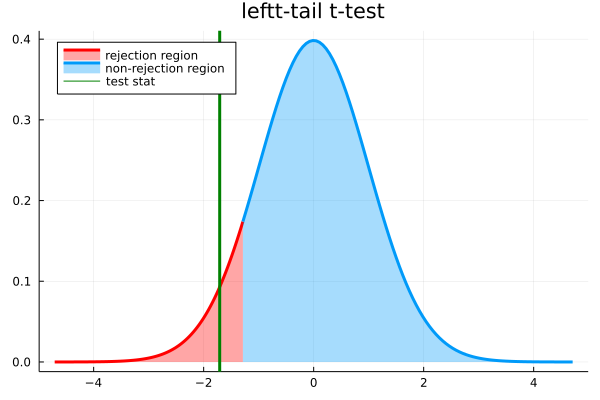

the left-tail p-value is 0.044671988707959305



(-1.70858, 0.04467)

In [14]:
function t_test_left(OLS_model, hyp_val, sig_level, coef_ind)
    
    t_val = (coef(OLS_model)[coef_ind] - hyp_val)/stderror(OLS_model)[coef_ind];
    p_left = cdf(TDist(dof_residual(OLS_model)), t_val)

    println("the left-tail p-value is ", p_left, "\n")
    
    d = TDist(dof_residual(OLS_model))

    lower_bar = -1 * abs(t_val) - 3
    upper_bar = abs(t_val) + 3

    lb = quantile(d, sig_level)

    rg_low = range(lower_bar, lb; length = 100)
    rg_upp = range(lb, upper_bar; length = 100)

    plot(rg_low, pdf.(d, rg_low), fillrange = 0, fillalpha = 0.35, c = "red", lw = 3, label = "rejection region", legend = :topleft)
    plot!(rg_upp, pdf.(d, rg_upp), fillrange = 0, fillalpha = 0.35, c = 1, lw = 3, label = "non-rejection region", legend = :topleft)
    display(plot!([t_val], seriestype = :vline, c="green", linewidth=3, label="test stat", title="leftt-tail t-test"))
    
    return round(t_val, digits=5), round(p_left, digits=5)
    
end

hyp_val   = 0;
sig_level = 0.1;

tval, pval = t_test_left(M1, hyp_val, sig_level, 8)

# (f)

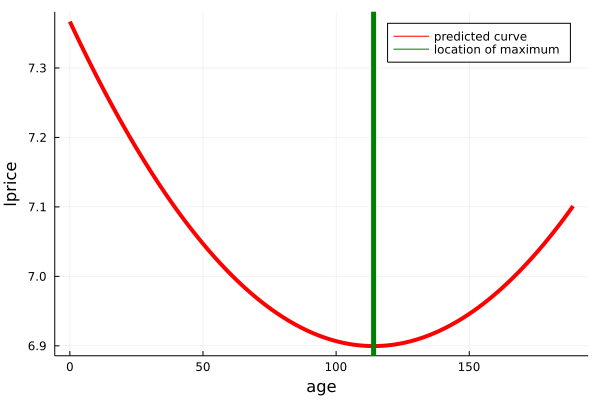

In [24]:
x  = minimum(df[:,:age]):0.01:maximum(df[:,:age]);
x2 = x.^2;

y = coef(M1)[1] .+ coef(M1)[6] * x .+ coef(M1)[7] * x2;

x_loc = x[findmin(y)[2]]

plot(xlabel="age", ylabel="lprice", legend=:topright)
plot!(x,y, label="predicted curve", c="red", lw=4)
plot!([x_loc], seriestype = :vline, c="green", linewidth=5, label="location of maximum")

# (g)

In [26]:
nullmodel = lm(@formula(lprice ~ 1 + rooms + baths + larea + lland + age + agesq + lcbd), df);
model     = lm(@formula(lprice ~ 1 + rooms + baths + larea + lland + lcbd), df);

ftest(nullmodel.model, model.model)

F-test: 2 models fitted on 179 observations
────────────────────────────────────────────────────────────────
     DOF  ΔDOF     SSR    ΔSSR      R²      ΔR²       F*   p(>F)
────────────────────────────────────────────────────────────────
[1]    9        7.7032          0.6786                          
[2]    7    -2  9.0403  1.3371  0.6229  -0.0558  14.8410  <1e-05
────────────────────────────────────────────────────────────────

# (h) BP test (F-test)

In [36]:
df[:,:yhat] = predict(M1, df);
df[:,:uhat] = df[:,:lprice] .- df[:,:yhat];
df[:,:uhat2] = df[:,:uhat].^2;

BP_Model = lm(@formula(uhat2 ~ 1 + rooms + baths + larea + lland + age + agesq + lcbd), df);

BP_Null = lm(@formula(uhat2 ~ 1), df);

ftest(BP_Null.model, BP_Model.model)

F-test: 2 models fitted on 179 observations
───────────────────────────────────────────────────────────────
     DOF  ΔDOF     SSR     ΔSSR      R²     ΔR²      F*   p(>F)
───────────────────────────────────────────────────────────────
[1]    2        2.6436           0.0000                        
[2]    9     7  2.5592  -0.0844  0.0319  0.0319  0.8055  0.5838
───────────────────────────────────────────────────────────────

# (i)

In [48]:
fm2 = @formula(lprice ~ 1 + rooms + baths + larea + lland + age + agesq)
M2 = lm(fm2, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lprice ~ 1 + rooms + baths + larea + lland + age + agesq

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   7.05724    0.529984    13.32    <1e-27   6.01113       8.10335
rooms         0.0576318  0.0222462    2.59    0.0104   0.0137212     0.101542
baths         0.0735335  0.0375598    1.96    0.0519  -0.000603873   0.147671
larea         0.389071   0.0736515    5.28    <1e-06   0.243694      0.534448
lland         0.0701688  0.0253588    2.77    0.0063   0.0201143     0.120223
age          -0.0066653  0.00173322  -3.85    0.0002  -0.0100864    -0.00324419
agesq         2.7925e-5  1.0277e-5    2.7

# (j)

In [38]:
df[!,:area_room] = df[:,:larea] .* df[:,:rooms];

In [39]:
fm3 = @formula(lprice ~ 1 + rooms + baths + larea + lland + age + agesq + lcbd + area_room)
M3 = lm(fm3, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lprice ~ 1 + rooms + baths + larea + lland + age + agesq + lcbd + area_room

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  13.7275      1.99812      6.87    <1e-09   9.78319     17.6719
rooms        -0.950437    0.306896    -3.10    0.0023  -1.55626     -0.344618
baths         0.0538672   0.0367509    1.47    0.1446  -0.0186796    0.126414
larea        -0.47584     0.268336    -1.77    0.0780  -1.00554      0.0538606
lland         0.100535    0.0319534    3.15    0.0020   0.0374584    0.163611
age          -0.00796176  0.00188824  -4.22    <1e-04  -0.0116892   -0.00423434
agesq         3.13672e